In [1]:
import numpy as np
import pandas as pd
# import dcMinMaxFunctions as dc
# import dcor
from scipy.misc import derivative
from sklearn.model_selection import train_test_split
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
from scipy import stats
import wandb

from cov_help import *
device_name = "cuda:1"
device = torch.device(device_name)
data_path = "./data/covtype.csv"
norm = 1
X,Y = cov_data_loader(data_path,norm=norm)
# max_dist = torch.cdist(X, X).max()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


model_path = "Models/cov_Net_new_512_100"
model_embs_path = model_path.replace("Models","Embeddings")
if (model_path in ['Models/cov_full_expt_512_1','Models/cov_full_expt_512_100','Models/cov_full_expt_512_400','Models/cov_Net_new_512_100','Models/cov_Net_new_128_100']):
    X_emb_train = torch.load(model_embs_path + "/X_emb_train.pt")
    X_emb_test = torch.load(model_embs_path + "/X_emb_test.pt")
    losses_train = torch.load(model_embs_path + "/losses_train.pt")
    losses_test = torch.load(model_embs_path + "/losses_test.pt")        

In [2]:
losses_train,indices = torch.sort(losses_train)
set_eps = 1
ind = (losses_train < set_eps).sum()

    
    

X_emb_train_priv = X_emb_train[indices][:ind]
Y_train = Y_train[indices][:ind]

In [3]:
from sklearn.ensemble import RandomForestClassifier

# X, y = make_classification(n_samples=1000, n_features=4,
#                            n_informative=2, n_redundant=0,
#                            random_state=0, shuffle=False) 
clf = RandomForestClassifier(n_estimators=10,max_depth=10,  random_state=0)
clf.fit(X_emb_train_priv, Y_train)
# print((clf.predict(X_test)==Y_test).sum()/len(Y_test))
print((clf.predict(X_emb_test) == np.asarray(Y_test)).sum()/len(Y_test))

0.7400411349104584


In [2]:
import os
import torch
model_path = 'Models/cov_Net_new_512_100'
def get_folders(directory):
    folders = []
    for root, dirs, files in os.walk(directory):
        for dir in dirs:
            folders.append(dir)
    return folders

# Specify the directory path
directory_path = './Embeddings'

# Call the function to get the directory names
directory_names = get_folders(directory_path)

if(model_path[7:] in directory_names):
    dirpth =  './Embeddings/'+model_path[7:]
    X_emb_train = torch.load(dirpth+'/X_emb_train.pt')
    X_emb_test = torch.load(dirpth+'/X_emb_test.pt')
    losses_train = torch.load(dirpth+'/losses_train.pt')
    losses_test = torch.load(dirpth+'/losses_test.pt')
    


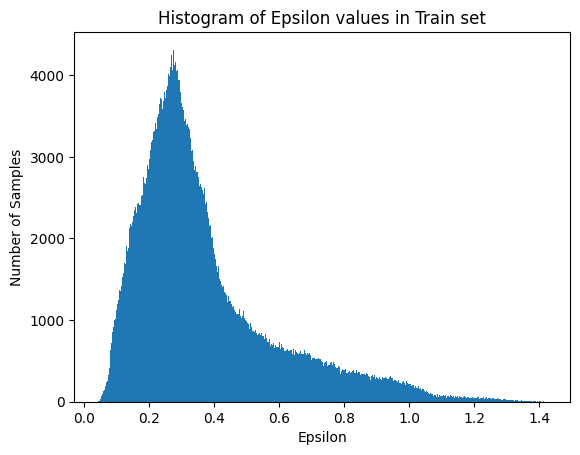

In [17]:
import matplotlib.pyplot as plt

# Assuming losses_test is a list or array containing the loss values


# Filter the losses within the range of 0 and 2
filtered_losses = [loss for loss in losses_train if 0 <= loss <= 2]

# Plot the histogram
plt.hist(filtered_losses, bins=500)
plt.xlabel('Epsilon')
plt.ylabel('Number of Samples')
plt.title('Histogram of Epsilon values in Train set')
plt.plot()
plt.savefig('histogram_train.png')

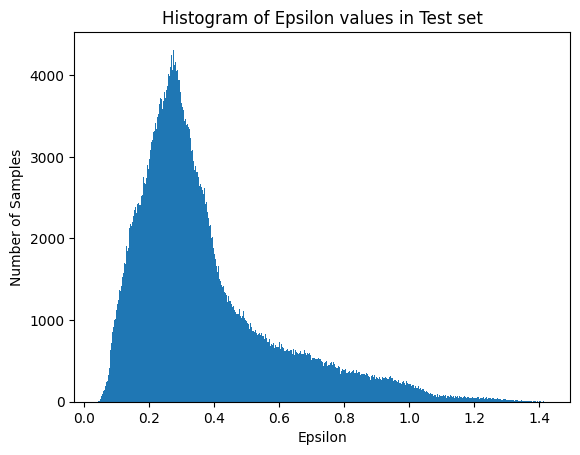

In [18]:
import matplotlib.pyplot as plt

# Assuming losses_test is a list or array containing the loss values


# Filter the losses within the range of 0 and 2
filtered_losses = [loss for loss in losses_train if 0 <= loss <= 2]

# Plot the histogram
plt.hist(filtered_losses, bins=500)
plt.xlabel('Epsilon')
plt.ylabel('Number of Samples')
plt.title('Histogram of Epsilon values in Test set')
plt.plot()
plt.savefig('histogram_test.png')

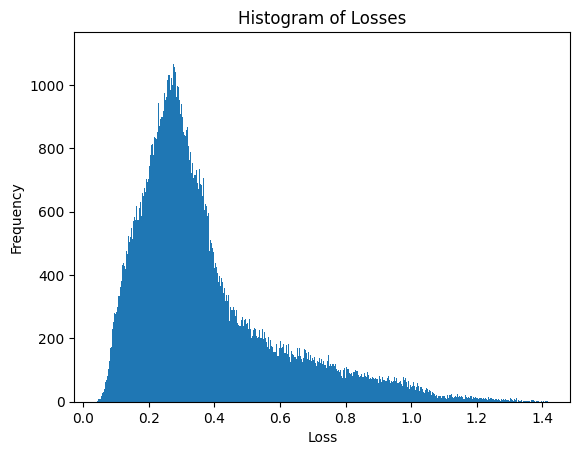

In [5]:
import matplotlib.pyplot as plt

# Assuming losses_test is a list or array containing the loss values


# Filter the losses within the range of 0 and 2
filtered_losses = [loss for loss in losses_test if 0 <= loss <= 2]

# Plot the histogram
plt.hist(filtered_losses, bins=500)
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.title('Histogram of Losses')
plt.show()

In [6]:
import os
import torch
model_path = 'Models/cov_non_priv_emb_512_100'
def get_folders(directory):
    folders = []
    for root, dirs, files in os.walk(directory):
        for dir in dirs:
            folders.append(dir)
    return folders

# Specify the directory path
directory_path = './Embeddings'

# Call the function to get the directory names
directory_names = get_folders(directory_path)

if(model_path[7:] in directory_names):
    dirpth =  './Embeddings/'+model_path[7:]
    X_emb_train1 = torch.load(dirpth+'/X_emb_train.pt')
    X_emb_test1 = torch.load(dirpth+'/X_emb_test.pt')
    losses_train1 = torch.load(dirpth+'/losses_train.pt')
    losses_test1 = torch.load(dirpth+'/losses_test.pt')

In [30]:
losses_train.shape

torch.Size([464809])

[]

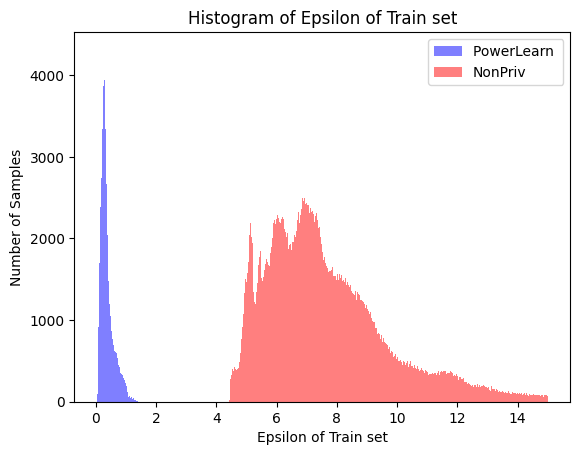

In [67]:
import matplotlib.pyplot as plt

# Assuming loss_train and loss_train_1 are your data
# loss_train = ...
# loss_train_1 = ...
filtered_losses = [loss for loss in losses_train if 0 <= loss <= 2]
filtered_losses1 = [loss for loss in losses_train1 if 0 <= loss <= 15]
plt.hist(filtered_losses, bins=500, alpha=0.5, label='PowerLearn ', color='blue')
plt.hist(filtered_losses1, bins=500, alpha=0.5, label='NonPriv', color='red')

plt.legend(loc='upper right')
plt.xlabel('Epsilon of Train set')
plt.ylabel('Number of Samples')
plt.title('Histogram of Epsilon of Train set')
plt.plot()
# plt.savefig('Forrest_non_comp_big_eps.png', dpi=1000)

In [36]:
plt.show()

In [33]:
plt.savefig('Forrest_Hits_eps.png')

<Figure size 640x480 with 0 Axes>

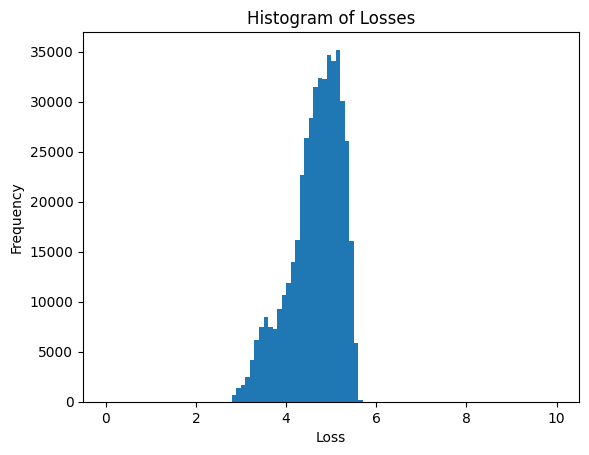

In [17]:
import matplotlib.pyplot as plt

# Assuming losses_test is a list or array containing the loss values


# Filter the losses within the range of 0 and 2
filtered_losses = [loss for loss in losses_train if 0 <= loss <= 10]

# Plot the histogram
plt.hist(filtered_losses, bins=100, range=(0, 10))
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.title('Histogram of Losses')
plt.show()

In [49]:
x = [0.35,0.4,0.5,0.7,1,1.25]
y_NN = [53,62.66,65.65,66.28,66.45,67.07]
y_RF = [66.12,67.00,69.43,73.5,74,73.78]
y_XGB = [71.69,76.42,81.67,83.66,85.4,85.71]
y_DP_Adam = [64.801,64.95,65.12,65.494,65.28,65.61]



# plt.plot(x,y_NN,label='NN')
# plt.plot(x,y_RF,label='RF')
# plt.plot(x,y_XGB,label='XGB')
# plt.xlabel('Epsilon')
# plt.ylabel('Accuracy')
# plt.title('Epsilon vs Accuracy')
# plt.legend()
# plt.show()



In [8]:
x = [0.35,0.4,0.5,0.7,1,1.25]
y_NN = [53,62.66,65.65,66.28,66.45,67.07]
y_RF = [66.12,67.00,69.43,73.5,74,73.78]
y_XGB = [71.69,76.42,81.67,83.66,85.4,85.71]
y_DP_Adam = [64.801,64.95,65.12,65.494,65.28,65.61]


In [15]:
x = [0.35,0.4,0.5,0.7,1,1.25]
y_NN = [52.98,63.26,65.07,66.25,66.79,67.00] 
y_RF = [65.96, 66.95, 69.58, 73.42, 73.81, 74.02]
y_XGB = [71.72,76.42,81.94,83.98,85.71,85.84]
y_DP_Adam = [64.81, 64.89, 65.10, 65.38, 65.43, 65.62]


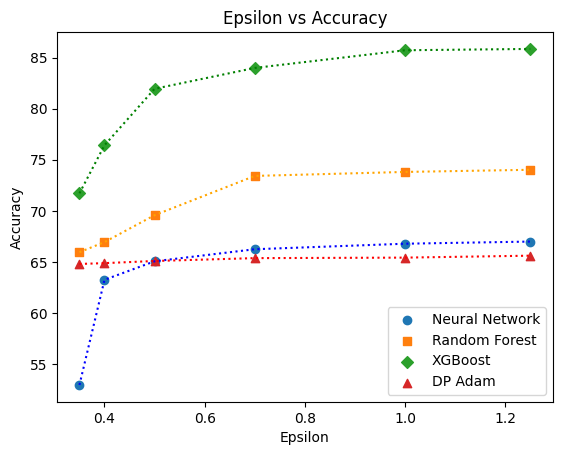

In [16]:
import matplotlib.pyplot as plt

# Define the symbols for each data point
symbols = ['o', 's', 'D', '^', 'v', 'P']

# Plot the scatter plot
plt.scatter(x, y_NN, marker=symbols[0], label='Neural Network')
plt.scatter(x, y_RF, marker=symbols[1], label='Random Forest')
plt.scatter(x, y_XGB, marker=symbols[2], label='XGBoost')
plt.scatter(x, y_DP_Adam, marker=symbols[3], label='DP Adam')

# Add dotted lines
plt.plot(x, y_NN, linestyle='dotted', color='blue')
plt.plot(x, y_RF, linestyle='dotted', color='orange')
plt.plot(x, y_XGB, linestyle='dotted', color='green')
plt.plot(x, y_DP_Adam, linestyle='dotted', color='red')

plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.title('Epsilon vs Accuracy')
plt.legend()
plt.plot()
plt.savefig('Forrest Epsilon_vs_Accuracy.png', dpi=1000)

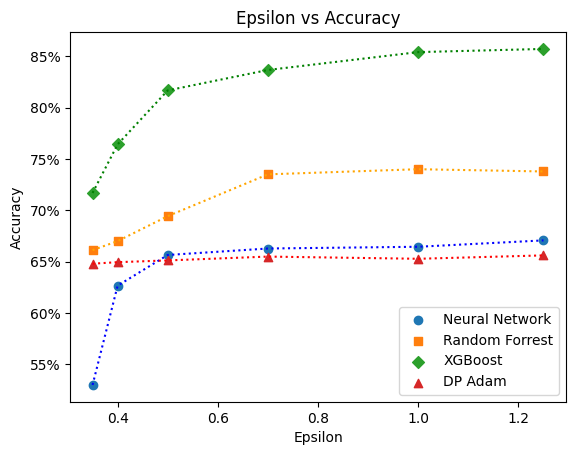

In [54]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Define the symbols for each data point
symbols = ['o', 's', 'D', '^', 'v', 'P']

# Plot the scatter plot
plt.scatter(x, y_NN, marker=symbols[0], label='Neural Network')
plt.scatter(x, y_RF, marker=symbols[1], label='Random Forrest')
plt.scatter(x, y_XGB, marker=symbols[2], label='XGBoost')
plt.scatter(x, y_DP_Adam, marker=symbols[3], label='DP Adam')

# Add dotted lines
plt.plot(x, y_NN, linestyle='dotted', color='blue')
plt.plot(x, y_RF, linestyle='dotted', color='orange')
plt.plot(x, y_XGB, linestyle='dotted', color='green')
plt.plot(x, y_DP_Adam, linestyle='dotted', color='red')

plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.title('Epsilon vs Accuracy')

# Format y-axis as percentage
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
plt.gca().yaxis.set_major_formatter(yticks)

plt.legend()
plt.plot()
plt.savefig('Forrest Epsilon_vs_Accuracy.png', dpi=1000)

In [10]:
import os
import torch
model_path = 'Models/cov_dp_adam_512_100'
def get_folders(directory):
    folders = []
    for root, dirs, files in os.walk(directory):
        for dir in dirs:
            folders.append(dir)
    return folders

# Specify the directory path
directory_path = './Embeddings'

# Call the function to get the directory names
directory_names = get_folders(directory_path)

if(model_path[7:] in directory_names):
    dirpth =  './Embeddings/'+model_path[7:]
    X_emb_train_dp = torch.load(dirpth+'/X_emb_train.pt')
    X_emb_test_dp = torch.load(dirpth+'/X_emb_test.pt')
    losses_train_dp = torch.load(dirpth+'/losses_train.pt')
    losses_test_dp = torch.load(dirpth+'/losses_test.pt')

In [11]:
losses_train

tensor([0.2958, 0.1665, 0.8075,  ..., 0.2766, 0.8093, 0.3158])

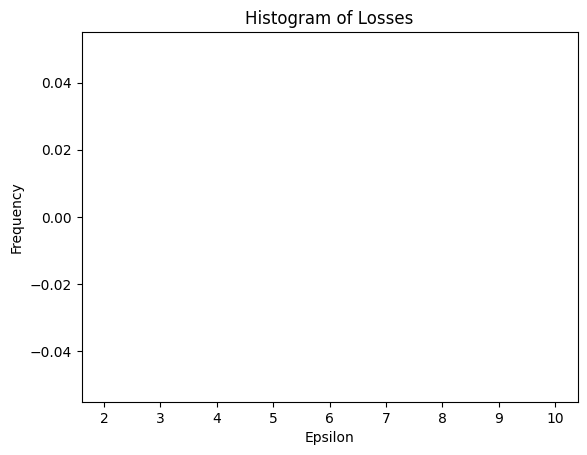

In [33]:
import matplotlib.pyplot as plt

# Assuming losses_test is a list or array containing the loss values


# Filter the losses within the range of 0 and 2
filtered_losses = [loss for loss in losses_train if 0 <= loss <= 10]

# Plot the histogram
plt.hist(filtered_losses, bins=500, range=(2, 10))
plt.xlabel('Epsilon')
plt.ylabel('Frequency')
plt.title('Histogram of Losses')
plt.show()

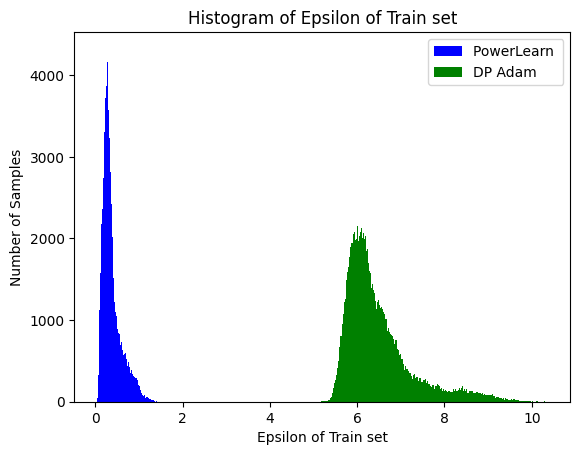

In [14]:
import matplotlib.pyplot as plt

# Assuming loss_train and loss_train_1 are your data
# loss_train = ...
# loss_train_1 = ...

plt.hist(losses_train, bins=500,  label='PowerLearn ', color='blue')
plt.hist(losses_train_dp, bins= 1000,  label='DP Adam', color='green')
# plt.hist(losses_train1, bins= int(bin_non),  label='NonPriv', color='green')

plt.legend(loc='upper right')
plt.xlabel('Epsilon of Train set')
plt.ylabel('Number of Samples')
plt.title('Histogram of Epsilon of Train set')
plt.plot()
plt.savefig('Forrest_Dp_non_priv_comp_eps.png', dpi=1000)

In [57]:
bin_pl = 50*(losses_train.max() - losses_train.min())
bin_dp = 50*(losses_train_dp.max() - losses_train_dp.min())
bin_non = 50*(losses_train1.max() - losses_train1.min())

In [55]:
bin_dp

tensor(961.6281)